# Import Packages and observe dataset

In [1]:
#Import numerical libraries
import pandas as pd
import numpy as np

#Import graphical plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Import Linear Regression Machine Learning Libraries
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv(r'C:\Ds & AI ( my work)\Machine Learning\Regression\Regularizations/car-mpg.csv')
data.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [3]:
print(data.columns)

Index(['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin', 'car_type',
       'car_name'],
      dtype='object')


In [4]:
#Drop car name
#Replace origin into 1,2,3.. dont forget get_dummies
#Replace ? with nan
#Replace all nan with median

import numpy as np
import pandas as pd

# Drop car name
data = data.drop(['car_name'], axis=1)

# If origin is not already converted, then do this:
if 'origin' in data.columns:
    data['origin'] = data['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
    data = pd.get_dummies(data, columns=['origin'])

# Replace '?' with NaN
data = data.replace('?', np.nan)

# Fill NaN with median
data = data.apply(lambda x: x.fillna(x.median()) if x.dtype != 'object' else x)


In [5]:
data.head()

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,0,True,False,False
1,15.0,8,350.0,165,3693,11.5,70,0,True,False,False
2,18.0,8,318.0,150,3436,11.0,70,0,True,False,False
3,16.0,8,304.0,150,3433,12.0,70,0,True,False,False
4,17.0,8,302.0,140,3449,10.5,70,0,True,False,False


In [6]:
data = data.apply(pd.to_numeric,errors='ignore')

#Fill missing values with median only for numeric coulmns
bool_cols = data.select_dtypes(include='bool').columns
data[bool_cols] = data[bool_cols].astype(int)

numeric_cols = data.select_dtypes(include=[np.number]).columns
data[numeric_cols] = data[numeric_cols].apply(lambda x: x.fillna(x.median()))

C:\Users\91918\AppData\Local\Temp\ipykernel_34956\341702357.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data = data.apply(pd.to_numeric,errors='ignore')


In [7]:
data.head()

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,0,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,0,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,0,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,0,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,0,1,0,0


# Model Building

In [8]:
x = data.drop(['mpg'], axis = 1)     # independent variable
y = data[['mpg']]    # dependent variable

In [9]:
# scaling the data 
x_s = preprocessing.scale(x)
x_s = pd.DataFrame(x_s, columns = x.columns)   #converting scaled data into dataframe 

y_s = preprocessing.scale(y)
y_s = pd.DataFrame(y_s, columns = y.columns)   #ideally train, test data should be in columns

In [10]:
x_s

,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
...,...,...,...,...,...,...,...,...,...,...
393,-0.856321,-0.513026,-0.479482,-0.213324,0.011586,1.621983,0.941412,0.773559,-0.497643,-0.461968
394,-0.856321,-0.925936,-1.370127,-0.993671,3.279296,1.621983,0.941412,-1.292726,-0.497643,2.164651
395,-0.856321,-0.561039,-0.531873,-0.798585,-1.440730,1.621983,0.941412,0.773559,-0.497643,-0.461968
396,-0.856321,-0.705077,-0.662850,-0.408411,1.100822,1.621983,0.941412,0.773559,-0.497643,-0.461968


In [11]:
data.shape

(398, 11)

In [12]:
# Split into train, test set
x_train, x_test, y_train,y_test = train_test_split(x_s,y_s, test_size = 0.20, random_state = 0)
x_train.shape

(318, 10)

# a. Simple Linear Model

In [13]:
#Fit simple linear model and find coefficients
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

for idx, col_name in enumerate(x_train.columns):
    print('The coefficient for {} is {}'.format(col_name, regression_model.coef_[0][idx]))
    
intercept = regression_model.intercept_[0]
print('The intercept is {}'.format(intercept))

The coefficient for cyl is 0.24638776053571707
The coefficient for disp is 0.2917709209866455
The coefficient for hp is -0.18081621820393645
The coefficient for wt is -0.6675530609868128
The coefficient for acc is 0.06537309205777064
The coefficient for yr is 0.34817702594267197
The coefficient for car_type is 0.3339231253960366
The coefficient for origin_america is -0.08117984631926997
The coefficient for origin_asia is 0.0698609820966494
The coefficient for origin_europe is 0.03000316124228807
The intercept is -0.01800683137092323


# b. Regularized Ridge Regression

In [14]:
#alpha factor here is lambda (penalty term) which helps to reduce the magnitude of coeff

ridge_model = Ridge(alpha = 0.3)
ridge_model.fit(x_train, y_train)

print('Ridge model coef: {}'.format(ridge_model.coef_))
#As the data has 10 columns hence 10 coefficients appear here    

Ridge model coef: [ 0.24342352  0.28293268 -0.18074242 -0.65967997  0.06398366  0.34745486
  0.33096428 -0.08087356  0.06988696  0.0295866 ]


# c.Lasso Regression

In [15]:
#alpha factor here is lambda (penalty term) which helps to reduce the magnitude of coeff

lasso_model = Lasso(alpha = 0.1)
lasso_model.fit(x_train, y_train)

print('Lasso model coef: {}'.format(lasso_model.coef_))
#As the data has 10 columns hence 10 coefficients appear here 

Lasso model coef: [-0.         -0.         -0.07247557 -0.45867691  0.          0.2698134
  0.11341188 -0.04988145  0.          0.        ]


# Score Comparison

In [16]:
#Model score - r^2 or coeff of determinant
#r^2 = 1-(RSS/TSS) = Regression error/TSS 


#Simple Linear Model
print(regression_model.score(x_train, y_train))
print(regression_model.score(x_test, y_test))

print('*************************')
#Ridge
print(ridge_model.score(x_train, y_train))
print(ridge_model.score(x_test, y_test))

print('*************************')
#Lasso
print(lasso_model.score(x_train, y_train))
print(lasso_model.score(x_test, y_test))

0.8373422857977738
0.8474768646673948
*************************
0.8373329560874541
0.8472637866465942
*************************
0.8007202116330951
0.8283046020148334


# Model Parameter Tuning

In [17]:
data_train_test = pd.concat([x_train, y_train], axis =1)
data_train_test.head()

,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe,mpg
64,1.498191,1.196232,1.197027,1.376929,-0.750880,-1.085858,-1.062235,0.773559,-0.497643,-0.461968,-1.090751
55,-0.856321,-0.925936,-1.160564,-1.343645,1.246054,-1.356642,0.941412,-1.292726,-0.497643,2.164651,0.446497
317,-0.856321,-0.925936,-0.689046,-0.925095,0.084201,1.080415,0.941412,-1.292726,-0.497643,2.164651,1.381656
102,-0.856321,-0.925936,-1.527300,-1.206493,1.972212,-0.815074,0.941412,-1.292726,-0.497643,2.164651,0.318393
358,-0.856321,-0.705077,-0.793827,-0.396587,0.991899,1.351199,0.941412,-1.292726,2.009471,-0.461968,1.035775


In [18]:
!pip install statsmodels

In [19]:
import statsmodels.formula.api as smf
ols1 = smf.ols(formula = 'mpg ~ cyl+disp+hp+wt+acc+yr+car_type+origin_america+origin_europe+origin_asia', data = data_train_test).fit()
ols1.params

Intercept        -0.018007
cyl               0.246388
disp              0.291771
hp               -0.180816
wt               -0.667553
acc               0.065373
yr                0.348177
car_type          0.333923
origin_america   -0.081180
origin_europe     0.030003
origin_asia       0.069861
dtype: float64

In [20]:
print(ols1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     176.2
Date:                Tue, 26 Aug 2025   Prob (F-statistic):          7.60e-116
Time:                        18:25:51   Log-Likelihood:                -160.75
No. Observations:                 318   AIC:                             341.5
Df Residuals:                     308   BIC:                             379.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0180      0.023     -0.

In [21]:
#Lets check Sum of Squared Errors (SSE) by predicting value of y for test cases and subtracting from the actual y for the test cases
mse  = np.mean((regression_model.predict(x_test)-y_test)**2)

# root of mean_sq_error is standard deviation i.e. avg variance between predicted and actual
import math
rmse = math.sqrt(mse)
print('Root Mean Squared Error: {}'.format(rmse))

Root Mean Squared Error: 0.39853963361814243


**So there is an avg. mpg difference of 0.37 from real mpg**

<Axes: xlabel='acc', ylabel='mpg'>

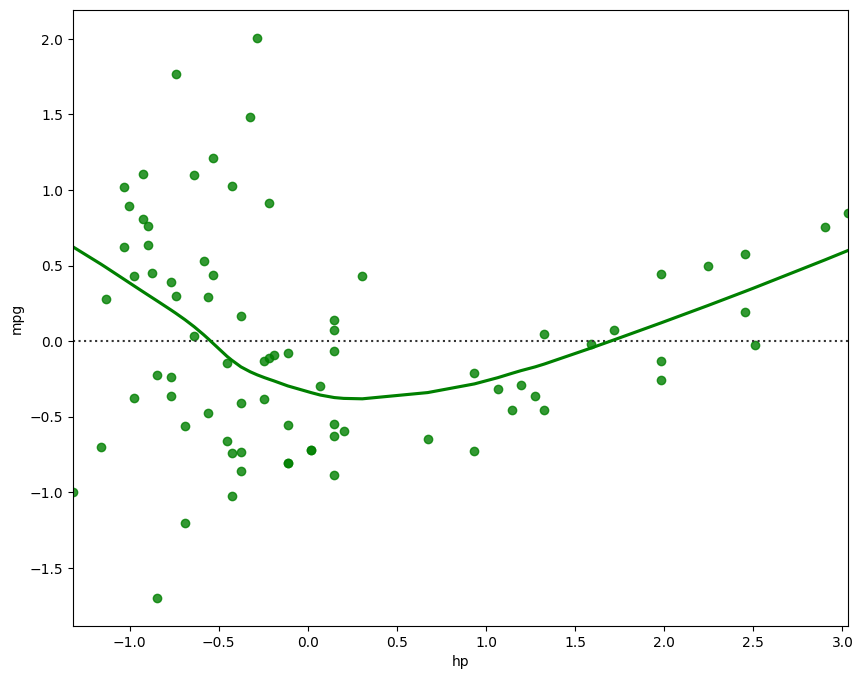

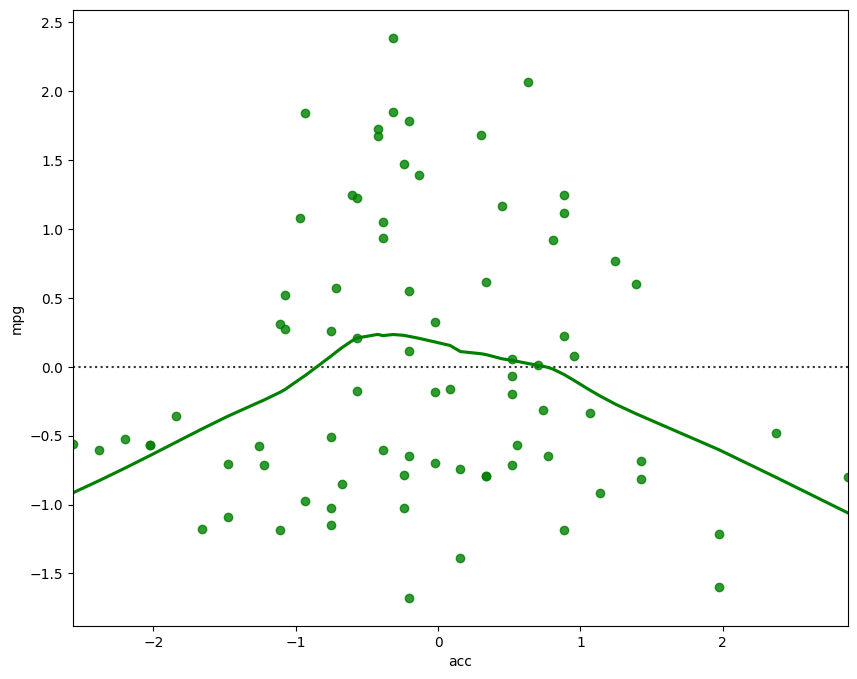

In [22]:
# Is OLS a good model ? Lets check the residuals for some of these predictor.

fig = plt.figure(figsize=(10,8))
sns.residplot(x= x_test['hp'], y= y_test['mpg'], color='green', lowess=True )


fig = plt.figure(figsize=(10,8))
sns.residplot(x= x_test['acc'], y= y_test['mpg'], color='green', lowess=True )

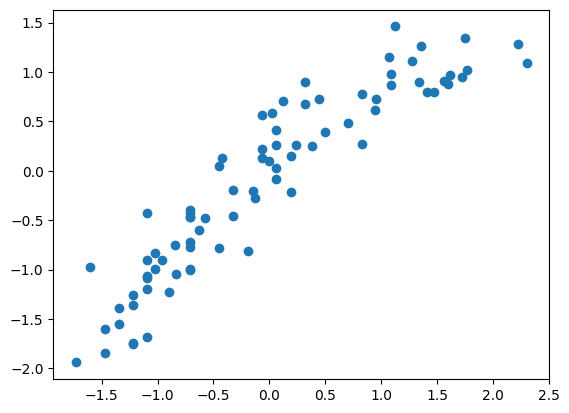

In [24]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred = regression_model.predict(x_test)

# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
#plt.rcParams['figure.dpi'] = 500
plt.scatter(y_test['mpg'], y_pred)